In [188]:
import pandas as pd
import numpy as np
df = pd.read_csv("google-play-store-apps/googleplaystore.csv")
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [189]:
# User reviews
df_reviews = pd.read_csv("google-play-store-apps/googleplaystore_user_reviews.csv")
# df_reviews.head()

In [190]:
# App dataset cleanup

# Not dropping rows with null values as it results in key errors later on
# For analysis, ignore the rows with Rating = -1, Size = 0 and Installs = -1 instead of dropping them
values = {"Rating":-1, "Reviews":"-1", "Size":"0", "Installs":"-1", "Content Rating": "Not Rated", "Genres": "Not Assigned", "Last Updated": "No Date"}
df = df.fillna(value = values)
df = df.drop(columns=['Current Ver', 'Android Ver'])

In [191]:
# Cleaning up df further to make visualizations easier

# Fixing up a data point
df.loc[10472,"App"] = "Life Made WI-Fi Touchscreen Photo Frame"
df.loc[10472,"Category"] = "PERSONALIZATION"
df.loc[10472,"Rating"] = "1.9"
df.loc[10472,"Reviews"] = "19"
df.loc[10472,"Size"] = "3M"
df.loc[10472,"Installs"] = "1000+"
df.loc[10472,"Type"] = "Free"
df.loc[10472,"Price"] = "0.0"
df.loc[10472,"Content Rating"] = "Everyone"
df.loc[10472,"Genres"] = "Personalization"
df.loc[10472,"Last Updated"] = "February 11, 2018"

# Coverting Rating to a float value
# Recall: Null values are assigned a float value of -1
for i in range(len(df["Rating"])):
    df["Rating"].values[i] = float(df["Rating"].values[i])
    
# Converting Reviews to a float value
# Recall: Null values are assigned a float value of -1
for i in range(len(df["Reviews"])):
    df["Reviews"].values[i] = float(df["Reviews"].values[i].replace("M","000000"))
    
# Removing letters at the end of size of each app and coverting the size to a float value
# Recall: Null values are assigned a float value of 0
# Apps whose size vary with the device are assigned a value of -1
# Size of app is in Megabytes
for i in range(len(df["Size"])):
    df["Size"].values[i] = df["Size"].values[i].replace("M","000000")
    df["Size"].values[i] = df["Size"].values[i].replace("k","000")
    x = df["Size"].values[i]
    if(x.isdigit()==True):
        df["Size"].values[i] = float(x)/1000000
    else:
        df["Size"].values[i] = -1
    

# Removing the + at the end of number of installs and converting this value to a float
# Recall: Null values are assigned a value of -1
for i in range(len(df["Installs"])):
    x = df["Installs"].values[i]
    l = len(x)-1
    df["Installs"].values[i] = df["Installs"].values[i][:l].replace(",","")
    if(x.isdigit()==True):
        df["Installs"].values[i] = float(x)
        
# Removing the $ sign in front of the price and converting this value to a float
for i in range(len(df["Price"])):
    df["Price"].values[i] = float(df["Price"].values[i].replace("$",""))
    
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,-1,5000000,Free,0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,-1,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018"
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,-1,50000,Free,0,Everyone,Art & Design,"March 26, 2017"
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19,50000,Free,0,Everyone,Art & Design,"April 26, 2018"
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29,1000000,Free,0,Everyone,Art & Design,"June 14, 2018"
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33,1000000,Free,0,Everyone,Art & Design,"September 20, 2017"
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,-1,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018"


In [192]:
# Finding out number of apps per category 
v1 = pd.DataFrame(columns = ['Category','Number of Apps'])
v1['Number of Apps'] = df['Category'].value_counts()
v1['Category'] = v1['Number of Apps'].keys()
v1.set_index('Category')

total = v1['Number of Apps'].sum()

max_c = v1['Category'][0]
max_no = v1['Number of Apps'][0]
print("The category "+max_c+" has the largest number of apps with "+str(max_no/total*100)+" % of total scraped apps.")

min_c = v1['Category'][-1]
min_no = v1['Number of Apps'][-1]
print("The category "+min_c+" has the largest number of apps with "+str(min_no/total*100)+" % of total scraped apps.")

The category FAMILY has the largest number of apps with 18.190203855732868 % of total scraped apps.
The category BEAUTY has the largest number of apps with 0.48888478922608614 % of total scraped apps.


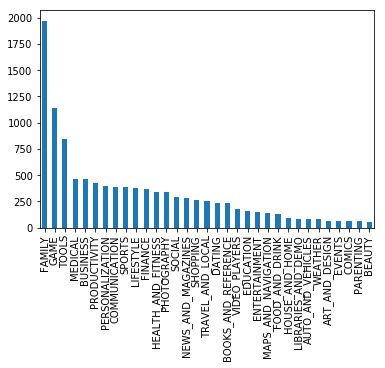

In [193]:
import matplotlib.pyplot as plt
%matplotlib inline
plot1 = df['Category'].value_counts().plot(kind='bar')

In [194]:
# From the above data, we can see the most developers make apps belonging to the categories of 
# FAMILY, GAME and TOOLS, so these categories have more competition.

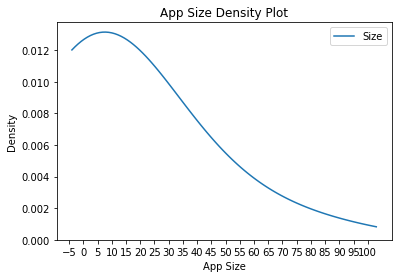

In [195]:
# Finding out a distribution of app sizes from the scrapped apps
import seaborn as sns
plt.subplot()
sns.kdeplot(df['Size'], bw=1)

plt.title ('App Size Density Plot')
plt.xlabel('App Size')
plt.xticks(np.arange(-5, 105, step=5))
plt.ylabel('Density')

plt.show()

In [196]:
# From the above graph, we see a huge peak around where app size is -1. From our data clean up, this means
# that either the app has different sizes depending on the device it is installed on, (size is 
# -1) or that that there was no value of the app size in the dataset (0). Hence, most of the apps that were scraped had different sizes depending on the 
# device. But unfortunately, this does not give us a target for the size of a working app,
# which may be useful to programmers.

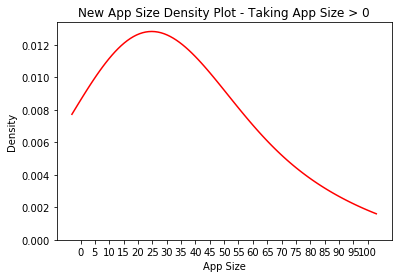

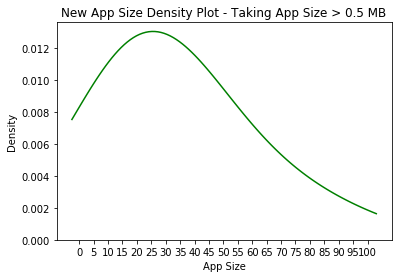

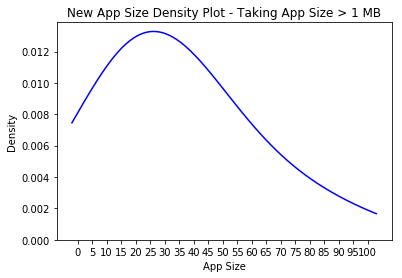

In [197]:
plt.subplot()

new_data = []
for x in df['Size']:
    if(x > 0):
        new_data.append(x)
        
sns.kdeplot(new_data, bw=1, color = 'red')

plt.title ('New App Size Density Plot - Taking App Size > 0')
plt.xlabel('App Size')
plt.xticks(np.arange(0, 105, step=5))
plt.ylabel('Density')

plt.show()

plt.subplot()

new_data = []
for x in df['Size']:
    if(x > 0.5):
        new_data.append(x)
        
sns.kdeplot(new_data, bw=1, color = 'green')

plt.title ('New App Size Density Plot - Taking App Size > 0.5 MB')
plt.xlabel('App Size')
plt.xticks(np.arange(0, 105, step=5))
plt.ylabel('Density')

plt.show()

plt.subplot()
new_data = []
for x in df['Size']:
    if(x > 1):
        new_data.append(x)

sns.kdeplot(new_data, bw=1, color = 'blue')

plt.title ('New App Size Density Plot - Taking App Size > 1 MB')
plt.xlabel('App Size')
plt.xticks(np.arange(0, 105, step=5))
plt.ylabel('Density')

plt.show()

In [198]:
# In order to get more information about the sizes of the apps on the Google Play Store, we 
# filter the apps by specifying a minimum app size. When we take app size > 0, in order 
# negate the influence of the data points that could skew the density plot (as discussed above),
# we find that there is still a peak around app size 0, but this is much smaller than the old plot. 
# Thus, in order to find out how many apps are truly greater than size 0, we increase the minimum app
# size to 0.5 MB then to 1 MB. As we do this, we see that the peak disappears, which means that
# there are very few apps with size < 1 MB. So we can ignore this peak.

# All the density plots show the highest peak at an app size of around 10 to 15 MB, with most 
# of the apps being in the range 5 to 40 MB. So, as a developer, a target app size would probably
# be between 10 to 15 MB.

In [199]:
# Encoding data to get numeric columns and plot a correlation matrix

new_df = df.drop(columns = ['App', 'Genres', 'Last Updated'])
new_df["Category"] = new_df["Category"].astype('category').cat.codes
new_df["Rating"] = new_df["Rating"].astype('category').cat.codes
new_df["Reviews"] = new_df["Reviews"].astype('category').cat.codes
new_df["Size"] = new_df["Size"].astype('category').cat.codes
new_df["Installs"] = new_df["Installs"].astype('category').cat.codes
new_df["Type"] = new_df["Type"].astype('category').cat.codes
new_df["Price"] = new_df["Price"].astype('category').cat.codes
new_df["Content Rating"] = new_df["Content Rating"].astype('category').cat.codes

corr1 = new_df.corr()
corr1.style.background_gradient(cmap='inferno')

,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
Category,1,0.00719016,0.0483158,-0.111143,0.0267619,0.0184016,-0.000873671,-0.0931542
Rating,0.00719016,1,0.433201,0.0430812,0.245464,-0.0258771,-0.0155108,0.060501
Reviews,0.0483158,0.433201,1,0.0789516,0.361866,-0.177005,-0.135424,0.169714
Size,-0.111143,0.0430812,0.0789516,1,0.0257805,-0.00511204,-0.00348603,0.105077
Installs,0.0267619,0.245464,0.361866,0.0257805,1,-0.121542,-0.102843,0.0627481
Type,0.0184016,-0.0258771,-0.177005,-0.00511204,-0.121542,1,0.780367,-0.0502975
Price,-0.000873671,-0.0155108,-0.135424,-0.00348603,-0.102843,0.780367,1,-0.0329137
Content Rating,-0.0931542,0.060501,0.169714,0.105077,0.0627481,-0.0502975,-0.0329137,1


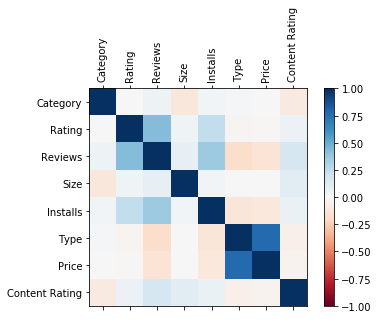

In [200]:
corr = new_df.corr()

fig = plt.figure()
ax = fig.add_subplot(111)
fig.colorbar(ax.matshow(corr, cmap='RdBu', vmin=-1, vmax=1))

ax.set_xticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns)
for tick in ax.get_xticklabels():
        tick.set_rotation(90)

ax.set_yticks(range(len(corr.columns)))
ax.set_yticklabels(corr.columns)

plt.show()

In [201]:
# From the correlational matrix, we see that the price and type of app have highly correlated,
# which is to be expected, since the type of app is either Free or Paid. The rating of the app
# has a high correlation with the number of reviews of the app as well as the number of times 
# it was installed. Also, the content rating has a mildly positive correlation with the number 
# of reviews, size of the app, number of installs and the rating of the app in decreasing order.

# If we were to create a model that would predict the rating of the app, the number of installs
# and the numbers of reviews of the app would be two main features that we would consider as 
# inputs.

In [202]:
### ===========
#     MODELS
### ===========

In [203]:
# Change 'Category' into integer values to process it
category_array = df["Category"].unique()
category_dict = dict(zip(category_array, range(len(category_array))))
df = df.replace(category_dict)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated
0,Photo Editor & Candy Camera & Grid & ScrapBook,0,4.1,159.0,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018"
1,Coloring book moana,0,3.9,967.0,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018"
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",0,4.7,87510.0,-1.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018"
3,Sketch - Draw & Paint,0,4.5,215644.0,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018"
4,Pixel Draw - Number Art Coloring Book,0,4.3,967.0,-1.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018"


In [204]:
# Linear Regression (in progress)
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

x = df[['Category', 'Reviews', 'Size', 'Installs', 'Price']]
y = df['Rating']
# y = np.asarray(df['Rating'], dtype="|S6")

In [205]:
x.describe()

,Category,Reviews,Size,Price
count,10841.000000,1.084100e+04,10841.000000,10841.000000
mean,17.665898,4.441119e+05,16.025741,1.027273
std,7.481687,2.927629e+06,23.550744,15.948971
min,0.000000,0.000000e+00,-1.000000,0.000000
25%,13.000000,3.800000e+01,-1.000000,0.000000
50%,18.000000,2.094000e+03,0.269000,0.000000
75%,23.000000,5.476800e+04,26.000000,0.000000
max,32.000000,7.815831e+07,100.000000,400.000000


In [206]:
reg_model = linear_model.LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
reg_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [207]:
# weights for each coefficient: 'Category', 'Reviews', 'Size', 'Installs', 'Price'
reg_weights_df = pd.DataFrame()
reg_weights_df['Coefficient'] = ['Category', 'Reviews', 'Size', 'Installs', 'Price']
reg_weights_df['Weight'] = reg_model.coef_
reg_weights_df

,Coefficient,Weight
0,Category,1.156678e-02
1,Reviews,1.503946e-08
2,Size,8.310215e-03
3,Installs,1.424396e-09
4,Price,-1.946412e-03


In [208]:
# Predicted values
reg_pred = reg_model.predict(x_test)

In [209]:
# Comparing actual and predicted values
reg_df = pd.DataFrame()
reg_df['Actual Value'] = y_test
reg_df['Predicted Value'] = reg_pred
reg_df

,Actual Value,Predicted Value
10610,3.3,3.362929
4253,2.3,3.258836
7947,4.4,3.155464
10259,3.7,4.014392
5088,-1.0,3.443890
638,-1.0,3.189420
6735,3.5,3.465327
3105,4.4,3.604285
4619,4.1,3.295411
9986,4.0,3.316819


In [210]:
# Root mean square error
np.sqrt(np.mean((reg_pred-y_test)**2))

1.8214263118444411

In [211]:
print("Training set score: %f" % reg_model.score(x_train, y_train))
print("Test set score: %f" % reg_model.score(x_test, y_test))

Training set score: 0.021272
Test set score: 0.010798


In [ ]:
# Perceptron Model (in progress)
import numpy as np
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt
import matplotlib.animation
import time
from sklearn.model_selection import train_test_split

X = df[['Category', 'Reviews', 'Size', 'Installs', 'Price']]
# df = df[(df['Rating']>0.25) | (df['Rating']<-0.25)] #extract from df
# y = np.asarray(df['Rating'])
Y = np.asarray(df['Rating'] > 4).astype(int)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.50)

In [ ]:
h = .02  # step size in the mesh
h = .001
x_min, x_max = X.min() - 1, X.max() + 1
y_min, y_max = min(X.min(),Y.min()) - 1, max(X.max(),Y.max()) + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
fig, ax = plt.subplots()
def anim_step(iterations):
    clf = Perceptron(max_iter=iterations+1).fit(X, Y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=Y)
ani = matplotlib.animation.FuncAnimation(fig, anim_step, frames=50, interval=10)
plt.show()

In [ ]:
# MLP Classifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

features = df[['Category', 'Reviews', 'Size', 'Installs', 'Price']]
target = np.asarray(df['Rating'], dtype="|S6")
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.50)
# x_train = x_train.astype('int')
# y_train = y_train.astype('int')

MLP = MLPClassifier()
MLP.fit(x_train, y_train)
print("Training set score: %f" % MLP.score(x_train, y_train))
print("Test set score: %f" % MLP.score(x_test, y_test))

In [ ]:
y_pred = MLP.predict(x_test)
accuracy_score(y_test, y_pred)

In [ ]:
fig, axes = plt.subplots(5, 1)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = MLP.coefs_[0].min(), MLP.coefs_[0].max()
for coef, ax in zip(MLP.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(1, 5), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [ ]:
# Heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, center=True)
plt.show()